# 1 S&P 500 index

Your friend Joe, who has recently started a consulting firm. He is working on a project to help a client understand the S&P500 index. Since both Joe and his client are new to the financial industry and had little knowledge about the market, they decide to starting with public available data and do some simple analysis. Joe learned that you are working on a master’s program on data analytic and called you for your opinion. Joe provide you with two data set in ".csv" format.

#### Datasets

* S&P500 historcal index value: "sp500indexdaily.csv"
* Stock price of S&P500 listed companies (2013-2018): "sp500_cmpny_all_stocks_5yr.csv"

## 1.1 Data Exploration

After getting the data, you decide to explore the data by visualizing it first. You started by looking at the records in "sp500indexdaily.csv" and made the following plots

1. Use the "close" price of SP500 and plot it against trading dates (between 2009-01-01 and 2018-12- 31). Instead of using actual date as x-axis, you can assign an integer to each trading date and set "2009-1-1" to "0", "2009-1-2" to "1", "2009-1-3" to "2" ... etc.).


2. In addition to the trend of SP500 against time, you look into the statistical distribution of the index. Specifically, create a histogram of the SP500 index between 2009 and 2018.


3. Does the histogram look like any distribution that you have learned so far? Provide your thoughts on how to describe a distribution like this (hints: where are the distribution peaks; could it be superposition of multiple normal distributions)?

In [1]:
# 1 S&P 500 index

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# loading data set

dfsp500 = pd.read_csv('sp500indexdaily.csv') # data S&P500 (as a conglomerate)
dfcompanies = pd.read_csv('sp500_cmpny_all_stocks_5yr.csv') # data from each company at the S&P500



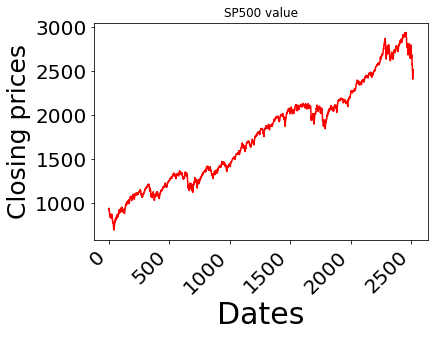

In [2]:
# 1.1 Data Exploration

# 1.1.1 Use the "close" price of SP500 and plot it against trading dates (between 2009-01-01 and 2018-12- 31). 
# Instead of using 'actual date' as x-axis, you can assign an integer to each trading date and set "2009-1-1" to 
# "0", "2009-1-2" to "1", "2009-1-3" to "2" ... etc.).

# just in case, we sort the values by date

#dfsp500 = dfsp500.sort_values(by="Date") # The data was ordered by date

#for i in range(len(dfsp500.index.values)):
#    if dfsp500.sort_values(by="Date").index[i] != i:
#       print('failure')

# Plotting

x = dfsp500.index.values
y = dfsp500.High.values

plt.plot(x,y, color = 'red')
plt.xticks(rotation=45, ha='right', size = 20)
plt.yticks(size = 20)
plt.xlabel('Dates', size = 30)
plt.ylabel('Closing prices', size = 25)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 25
plt.title('SP500 value')
plt.rcParams["figure.figsize"] = fig_size # size adjusted to the axes - in this case 25 x 30 (3000/2500 = 30/25)
plt.show()


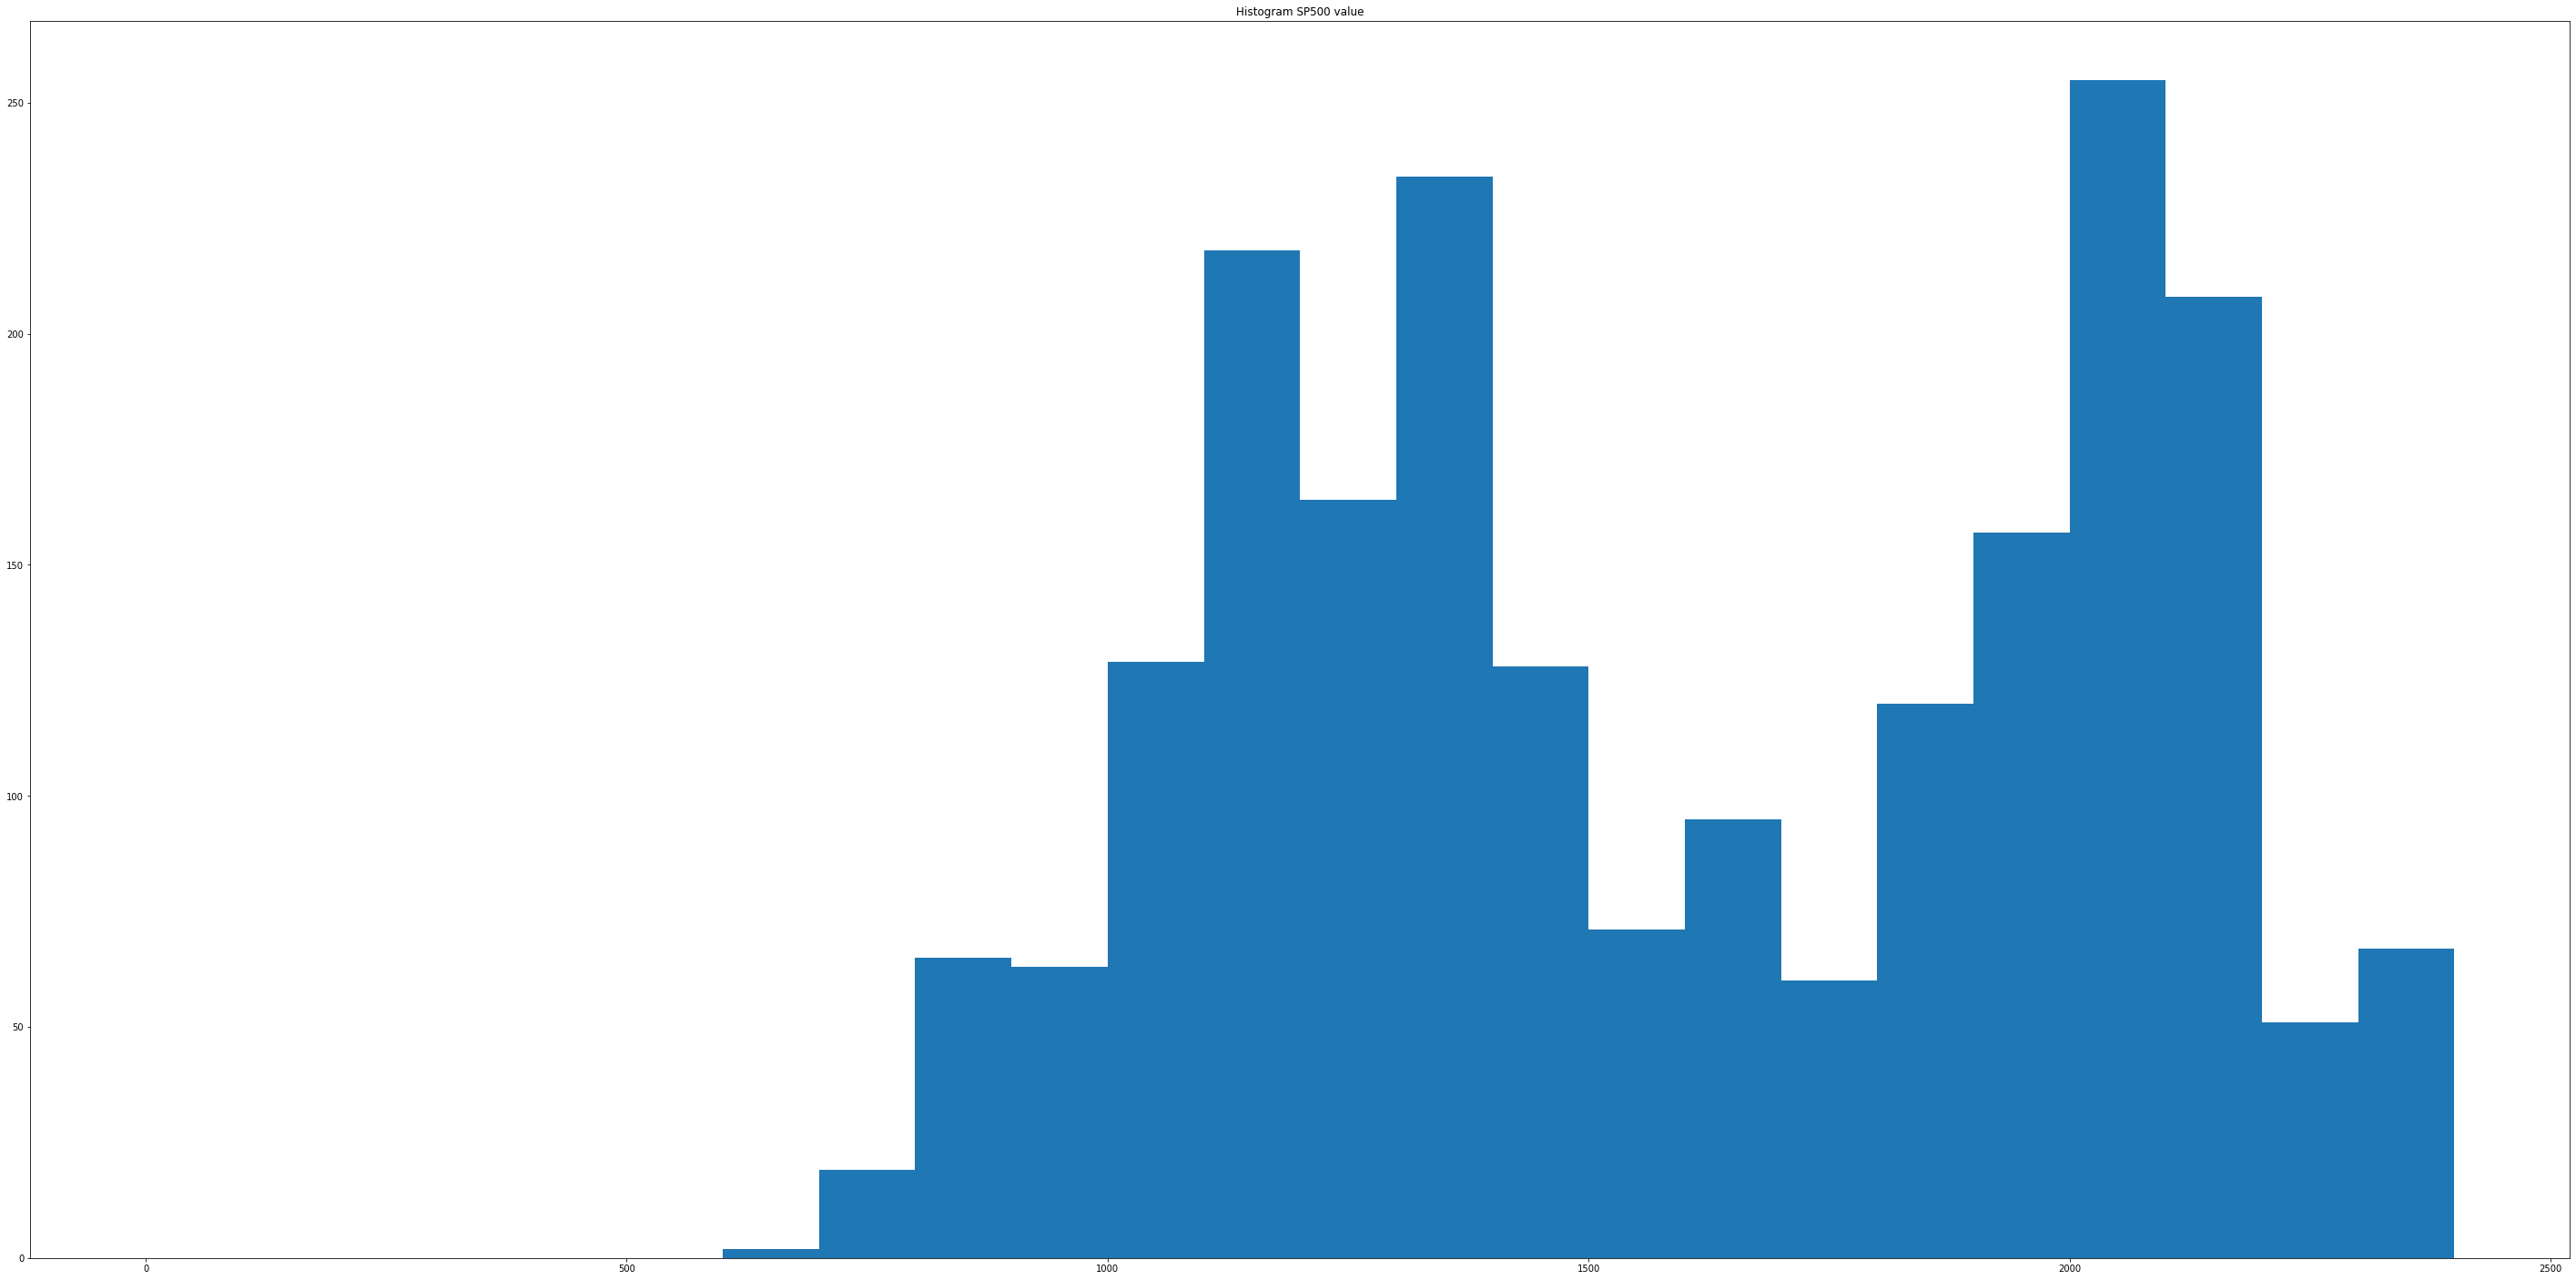

In [3]:
# 1.1 Data exploration

# 1.1.2 In addition to the trend of SP500 against time, you look into the statistical distribution 
# of the index. Specifically, create a histogram of the SP500 index between 2009 and 2018.

binblock = np.arange(0,2500,100)
plt.hist(y, bins = binblock) 
plt.title('Histogram SP500 value')
plt.show()



3. Does the histogram look like any distribution that you have learned so far? Provide your thoughts on how to describe a distribution like this (hints: where are the distribution peaks; could it be superposition of multiple normal distributions)?

It seems we have a superposition of different normal distributions at different points. Yes, if we look at the peaks there we observe the mean of each normal distribution. If we have an approximation of the standard deviation (taking neighbourhoods of these peaks) we can write different normal distributions. Recall that the normal distribution has two long tails, therefore if we add several of this distributions, multiplied by a truncation function, we get something similar to this picture.

Notice that if we have two normal distribution with a peak at the left and another at the right, if we add both distributions, we get a normal distribution which cancels, in some sense, both peaks if the variance of both distributions is big enough. Therefore the superposition, in most of the cases, I mean when the variance is big, is destructive (we get a peak which is smaller if the variance of both variables is big enough).

In mathematical language, if we have two independent variables

$X \sim N(\mu_1, \sigma_1)$ and $Y \sim N(\mu_2,\sigma_2)$, then $X+Y = Z \sim N(\mu_1+\mu_2, \sigma_1+\sigma_2)$.
The proof of this fact is straightforward. Notice that for the sum of these two standard normal distributions, we get 

\begin{align*}
E(e^{i\theta(X+Y)}) = E(e^{i\theta X})E(e^{i\theta Y}) = e^{-\theta^2}
\end{align*}

For general normal distributions we just rescale. An important fact here is that distributions are characterized by its characteristic function. Notice that, under certain conditions, the Fourier transform is invertible. Gaussians are in the Schwartz class, therefore have inverse Fourier transform (which are, of course, Gaussians).

The conclussion is that this is not a sum of normal distributions but a superposition, that is, we represent this adding different normal distributions which are truncated, that is, we multiply each normal distribution by a function of the type $\chi_A(x)$ (this functions is zero if $x \notin A$ and 1 if $x \in A$). 

If we denote $f_i$ the density function of each of these $X_i$ normal distributions, then the density function of this histogram is something similar to

\begin{align*}
\sum_{i = 1}^{m}a_i\chi_{I_i}f_i,
\end{align*}

where $m$ is certain integer and $\{I_i\}_i$ are $m$ intervals covering the interval $[0,2500]$, and the constants $a_i$ are rescaling constants that we add to this ecuation to imposse the condition of having integral one. We should be careful because the normal distribution appearing at each interval could the result of the sum (or substraction) of two different normal distributions. This original picture, I mean the plot in section 1.1, looks very complex and points to the Brownian motion, where differences of different steps appear as normal distributions. A final remark, possibly this picture is allowing the $I_i$ to have a minimal intersection where we add the values to get "two connected gaussians".

You can also think about this picture as a superposition of binomial distributions, but its difficult to confirm this. In any case the normal distribution can be interpreted as the limit of a sum of independent binomial distributions (Central Limit Theorem). 

## 1.2 Regression - Single Predictor

After looking at the SP500 index change over time i.e. plots 1.1(1), you decide to build a regression model to capture the trend of SP500 index.

1. In the GLM framework that you learned, what kind of distribution will you choose from the exponential family?

2. Build the GLM model

3. How can you interpret the betas in your model, phrase a few words that you can explain to Joe?

4. Make an in sample prediction for the SP500 index between 2009-2018. Compare it with the actual SP500 index (visualize it in a graph). What does the model capture/not capture?

5. Calculate the summed-square-error (SSE) of your in sample prediction. Do one for all data points and do one for the data points between 2017-2018

6. Based on the model, where do you think the SP500 index will be by the end of year 2020.

7. In order to validate your model, you also decide to use the data between 2009-2016 as training set and use 2017-2018 as test data set. What’s the summed-square-error (SSE) after applying the model on the test data set. Compare your validation SSE with the insample SSE from question (5)

## 1.2.1 In the GLM framework that you learned, what kind of distribution will you choose from the exponential family?

I think We should choose the normal distribution (linear regression), because we want 'to capture the trend'. If we want to capture if the graph is going up or down at each step we should use a logistic model (binomial distribution). Notice that we are modeling up or down at each step, if we suppose these are independent events, which is not true in these kind of cases, we would get a binomial distribution (sum of Bernoulli variables). 

I know this picture is 'locally' linear (in some complex sense because the plot is fractal). The plot of the original dataset looks like a Brownian motion, but we don't know anything about the independence of the differences, therefore I cannot claim this. I just point this because is the first idea you have when you look at this data set.

## 1.2.2 Build the GLM model 

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

X_pd = pd.DataFrame(x) 
X_pd = sm.add_constant(X_pd) 
Y_pd = pd.DataFrame(y)


gaussian_model = sm.GLM(Y_pd,X_pd, family = sm.families.Gaussian())
gaussian_model_results = gaussian_model.fit() # take parameters and fit the model
print(gaussian_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                 2516
Model:                            GLM   Df Residuals:                     2514
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          10648.
Method:                          IRLS   Log-Likelihood:                -15235.
Date:                Tue, 10 Nov 2020   Deviance:                   2.6770e+07
Time:                        01:06:12   Pearson chi2:                 2.68e+07
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        810.1268      4.113    196.954      0.0

## 1.2.3 How can you interpret the betas in your model, phrase a few words that you can explain to Joe?

In this case we have $\beta_1 = 0.7667$ and $\beta_0 = 810.1268$. The intercept is really big, this is telling us that the values at the beggining were close to 810.1265 (starting prices at the beggining of this time series). The $\beta_1$ is telling us that smaller changes in time give much smaller changes on price (taking in consideration that we start from the starting price of that market day), because when we change $t$ a little, time, in the $\beta_1 t+\beta_0$ we get values which are a little bit bigger, but pretty similar to the previous values. This is telling us that in general these index prices increase by little steps. I don't know if we have enough information to claim this, we should work much more, but it seems that this is a low-risk investment in short times. (Little changes on time, really little changes on price, little with respect the total increase). Here we should define what little means calculating the maximum decrease on this dataset or the mean increase per year (or another useful parameter). 

The slope of the line is positive and really small therefore the line is 'close' in some sense to the x-axis (this is an informal description, the precise description is that the derivative is constant and small, therefore the increases are small for that reason the line 'increases' slowly) but pointing to the right (we only consider positive times). 

Suppose $t_0 < t_1$ are two consecutive times, then 
$$y(t_1)-y(t_0) = 0.7667(t_1-t_0),$$

here we see that the increase is small if we compare this value with $810.1268$.

## 1.2.4 Make an in sample prediction for the SP500 index between 2009-2018. Compare it with the actual SP500 index (visualize it in a graph). What does the model capture/not capture?


In [5]:
# Calculating the asked prediction using the coefficients

y_pred = 0.7667*X_pd.index+810.1268




In [6]:
y_pred



Float64Index([          810.1268,           810.8935,           811.6602,
                        812.4269,           813.1936,           813.9603,
                         814.727,           815.4937,           816.2604,
                        817.0271,
              ...
                        2731.477,          2732.2437,          2733.0104,
              2733.7771000000002, 2734.5438000000004,          2735.3105,
                       2736.0772,          2736.8439,          2737.6106,
                       2738.3773],
             dtype='float64', length=2516)

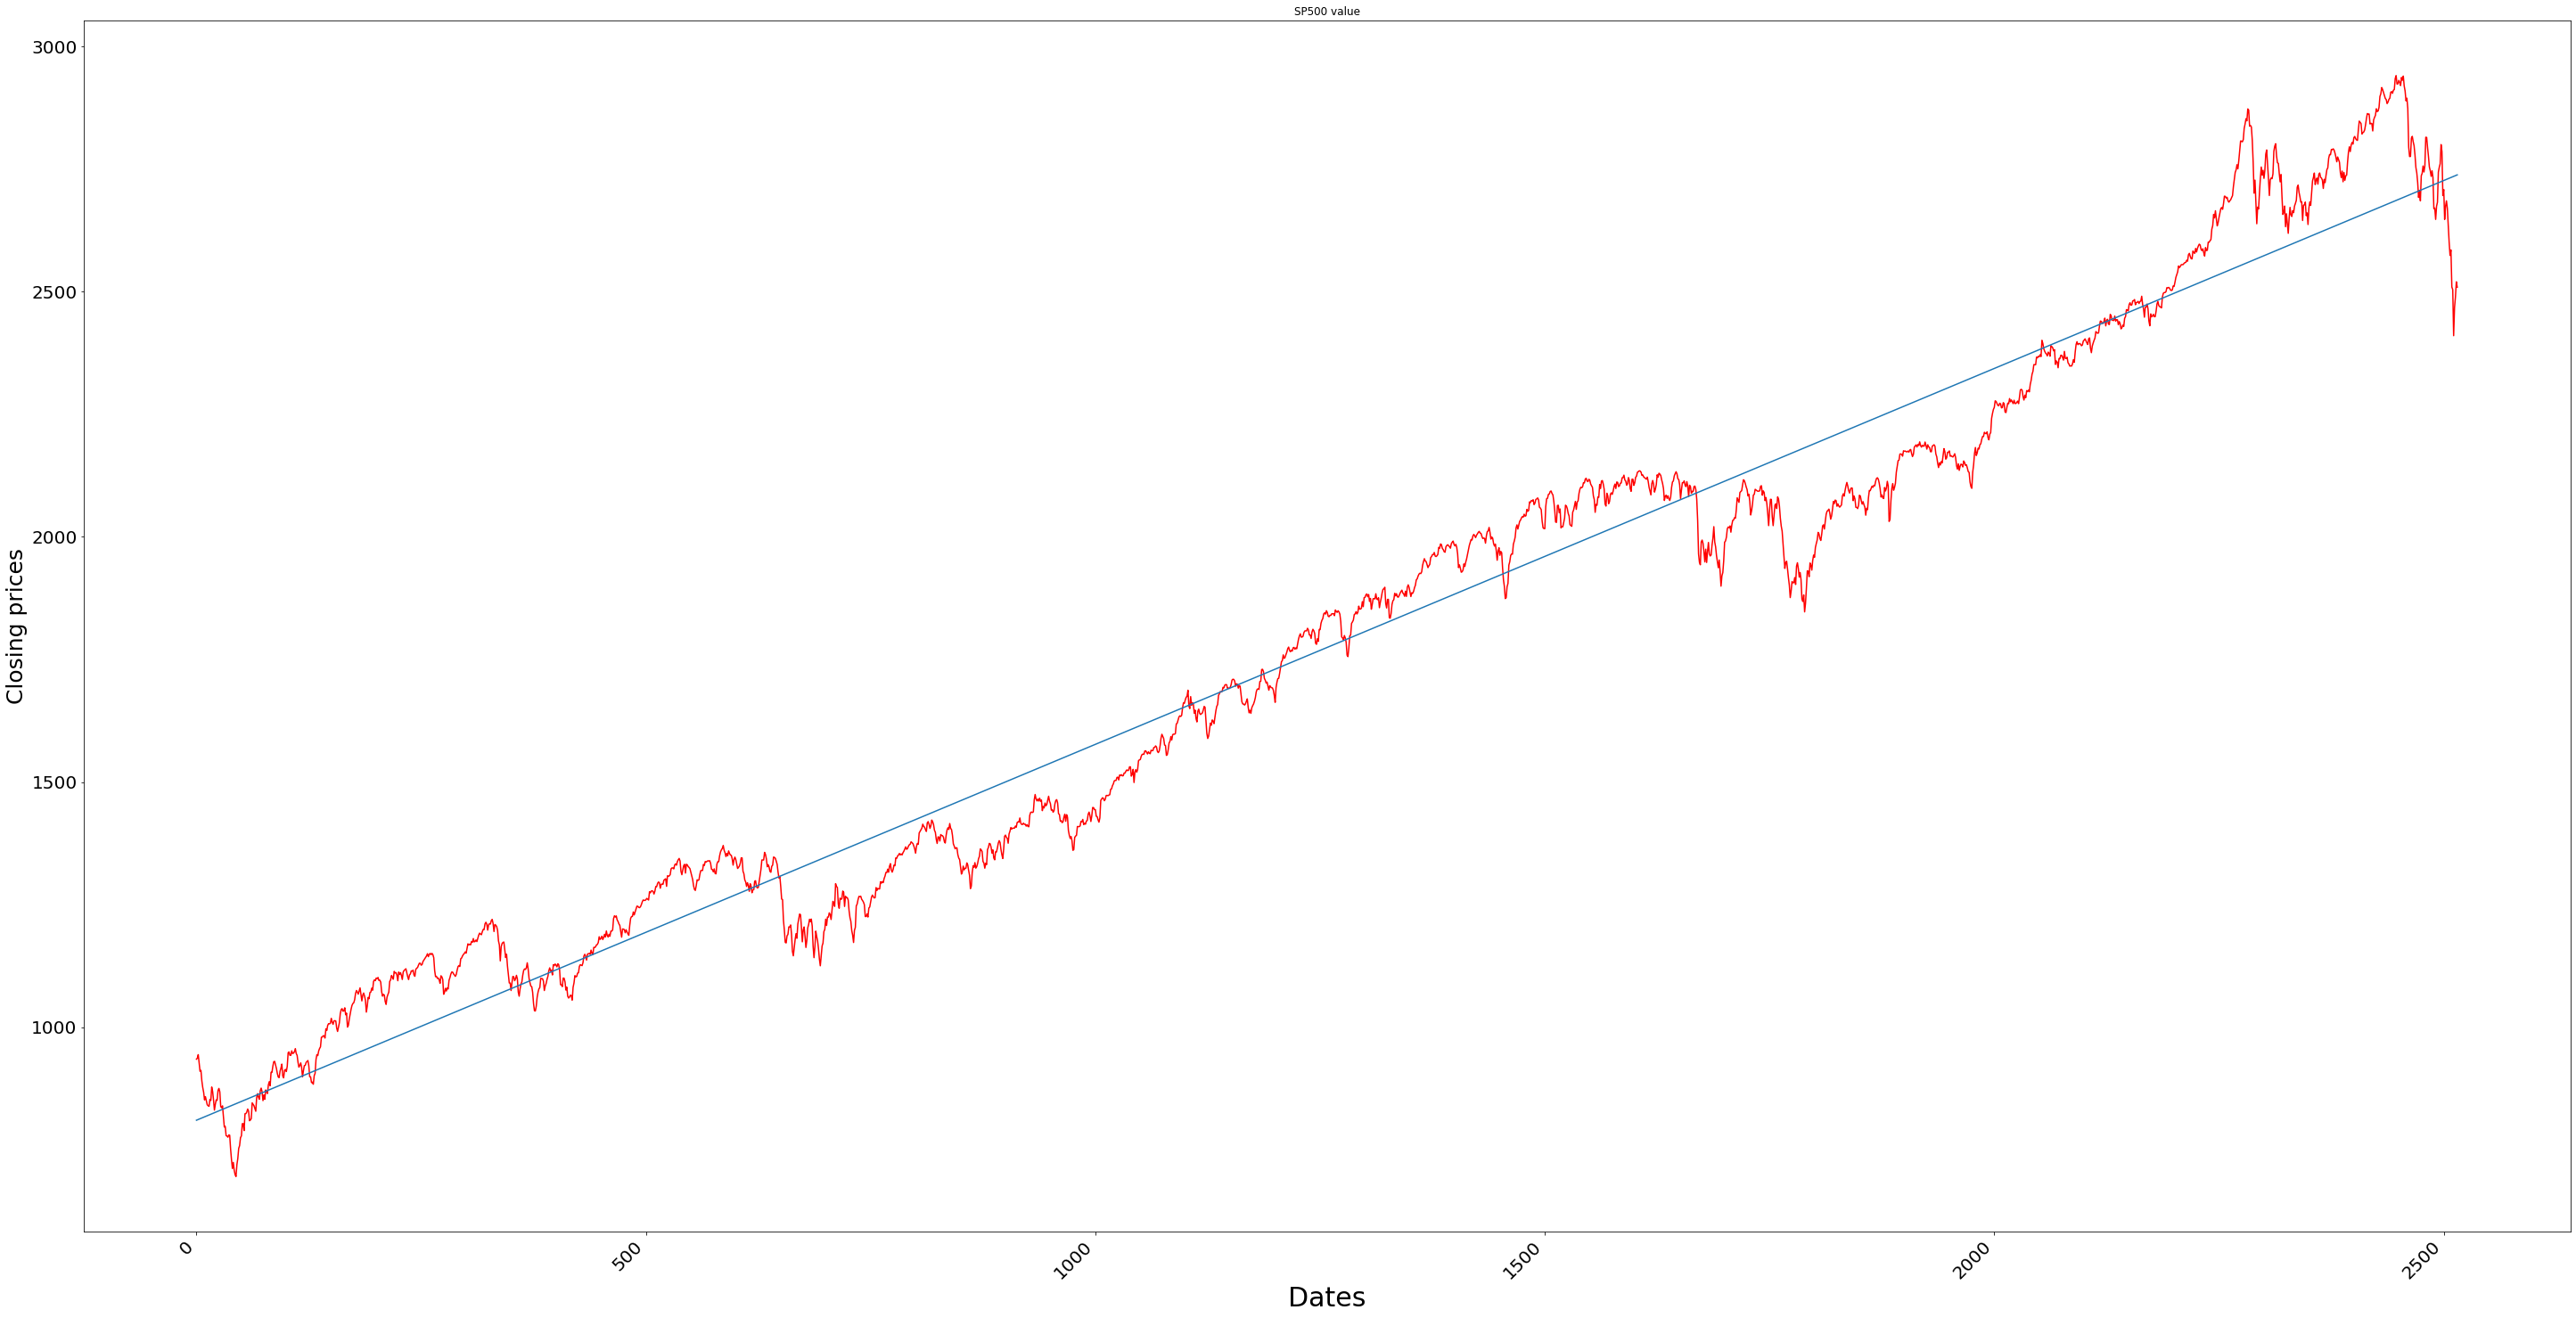

In [7]:
# plotting prediction against real values

# Plotting - This is the plot of the line explicitly 

x = dfsp500.index.values
y = dfsp500.High.values

plt.plot(x,y, color = 'red')
plt.plot(x,y_pred)
plt.xticks(rotation=45, ha='right', size = 20)
plt.yticks(size = 20)
plt.xlabel('Dates', size = 30)
plt.ylabel('Closing prices', size = 25)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 25
plt.title('SP500 value')
plt.rcParams["figure.figsize"] = fig_size # size adjusted to the axes - in this case 25 x 30 (3000/2500 = 30/25)
plt.show()



In [8]:
# This is the plot taking a sample from the predictors

from random import sample

x_sample = sample(list(dfsp500.index.values),1000)
x_sample = np.array(x_sample)
y_pred_sample = 0.7667*(x_sample)+810.1268



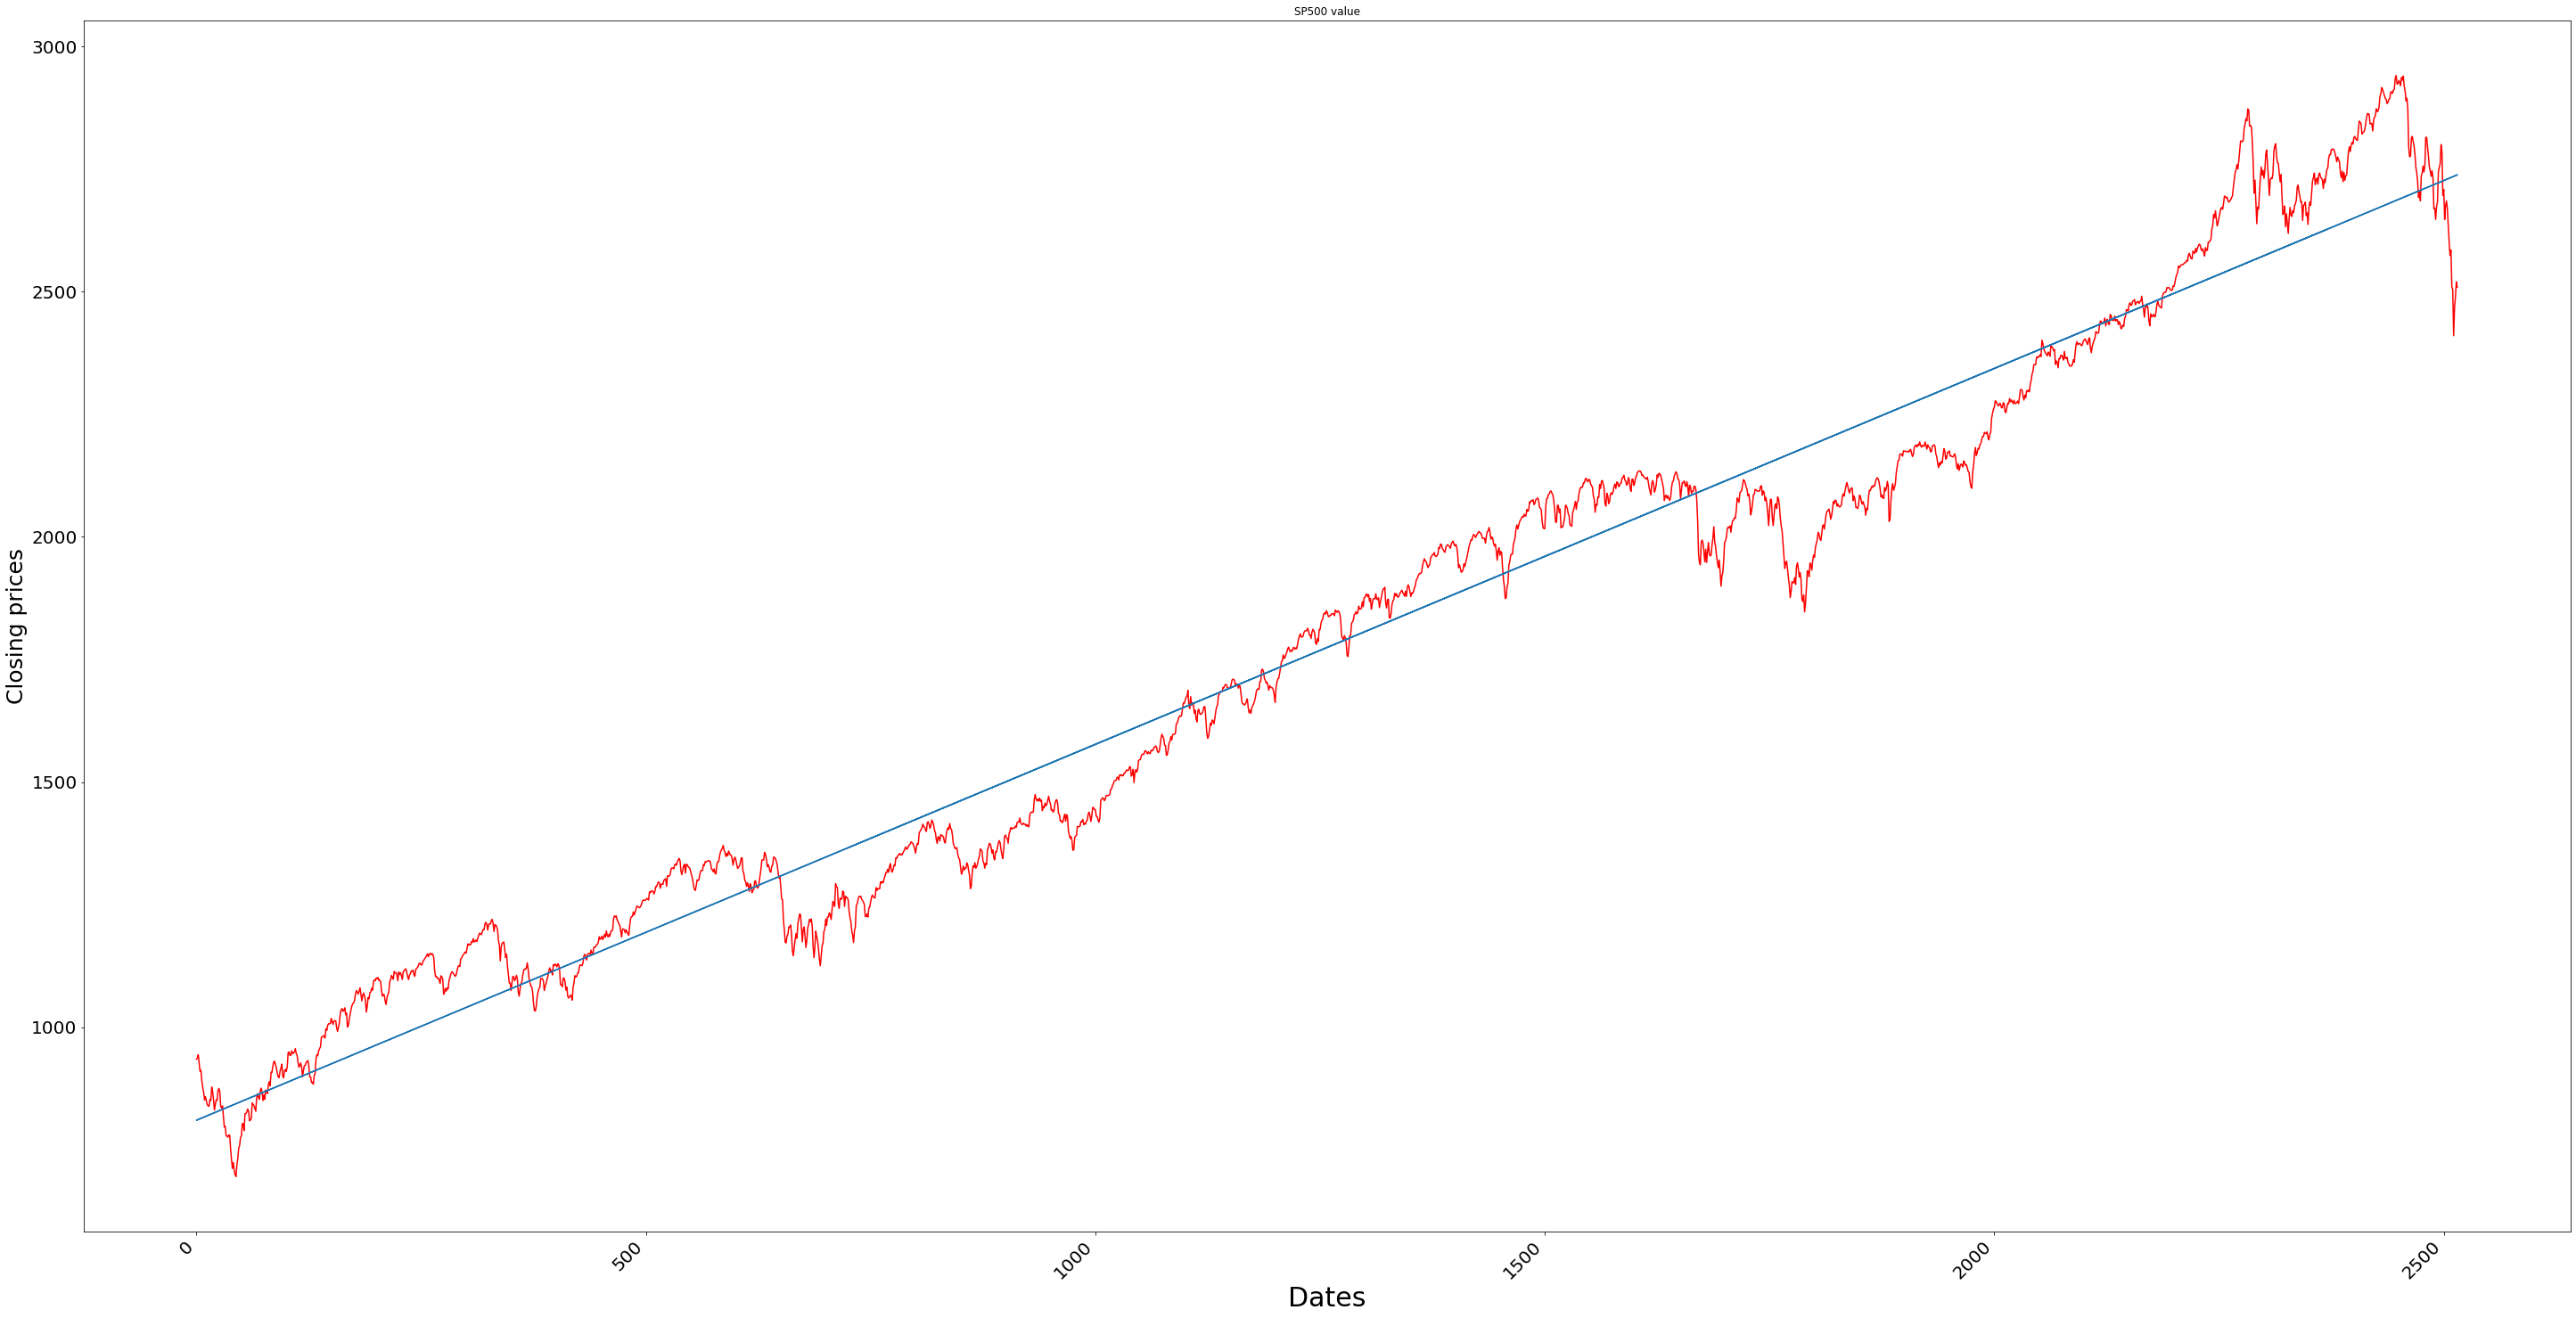

In [9]:
x = dfsp500.index.values
y = dfsp500.High.values

plt.plot(x,y, color = 'red')
plt.plot(x_sample,y_pred_sample)
plt.xticks(rotation=45, ha='right', size = 20)
plt.yticks(size = 20)
plt.xlabel('Dates', size = 30)
plt.ylabel('Closing prices', size = 25)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 25
plt.title('SP500 value')
plt.rcParams["figure.figsize"] = fig_size # size adjusted to the axes - in this case 25 x 30 (3000/2500 = 30/25)
plt.show()



### What does the model capture/not capture?

The model captures the global trend but does not captures the daily trend. The model does not capture the daily  lost. In general this is a model which give us a long time trend but it's not good for investing from one day to the other. We can consider this model if we want to invest in a long term. We can see that the model does not capture the lost of value in the last year. In general the model increases slowly because it is not capturing the daily fluctuation.

## 1.2.5 Calculate the summed-square-error (SSE) of your in sample prediction. Do one for all data points and do one for the data points between 2017-2018

In [10]:
y_real_sample = dfsp500.High[x_sample]

def SSE(x):
    sse = sum((x-np.mean(x))**2)
    return sse




In [11]:
from sklearn.metrics import mean_squared_error

# sample prediction

sse_1 = SSE(y_pred_sample)
print('The summed square error for our sample is', sse_1)



The summed square error for our sample is 314950060.23619187


In [12]:
# All data points

sse_2 = SSE(y_pred)
print('The summed square error for all the data points is', sse_2)



The summed square error for all the data points is 780192052.7907059


In [13]:
# Between 2017-2018

# Finding indices for 2017-2018

# We use the code

below = dfsp500.loc[dfsp500["Date"].str.startswith("2017")].index[0]
above = len(dfsp500.index)-1

# extract these values

y_1718 = dfsp500.High[(dfsp500.index <= above) & (dfsp500.index >= below)].values
x_1718 = dfsp500.High[(dfsp500.index <= above) & (dfsp500.index >= below)].index.values



In [14]:
# Predicting using the coefficients

y_pred_1718 = 0.7667*x_1718+810.1268

# Mean square error 17/18

sse_3 = SSE(y_pred_1718)
print('The summed square error for points 17/18 is', sse_3)



The summed square error for points 17/18 is 6196965.930905698


## 1.2.6 Based on the model, where do you think the SP500 index will be by the end of year 2020.

In [15]:
# We have to simulate indices for the 366 days of 2020.

# I use the coefficient to calculate the predictions because I wan to simplify the code.

x_20 = np.array(range(above+1,above+367))
y_pred_20 = 0.7667*(x_20)+810.1268



In [16]:
# Prediction end of the year 2020

print('The SP500 index high value will be {} by the end of the year 2020 (This is a prediction)'.format(y_pred_20[365]))


The SP500 index high value will be 3018.9895 by the end of the year 2020 (This is a prediction)


## 1.2.7 In order to validate your model, you also decide to use the data between 2009-2016 as training set and use 2017-2018 as test data set. What’s the summed-square-error (SSE) after applying the model on the test data set. Compare your validation SSE with the insample SSE from question (1.2.5).

In [17]:
# Extracting the validation and training sets

train_index_below = 0
train_index_above = 2013

test_index_below = 2014
test_index_above = len(dfsp500.index)-1

train_x = dfsp500.index[ (dfsp500.index >= 0) & (dfsp500.index <= train_index_above)].values
train_y = dfsp500.High[ (dfsp500.index >= 0) & (dfsp500.index <= train_index_above)].values

test_x = dfsp500.index[ (dfsp500.index >= test_index_below) & (dfsp500.index <= test_index_above)].values
test_y = dfsp500.High[ (dfsp500.index >= test_index_below) & (dfsp500.index <= test_index_above)].values




In [18]:
# Extracting real values from 2017-2018

real_1718 = dfsp500.High[(dfsp500.index >= test_index_below) & (dfsp500.index <= test_index_above)].values.T




In [19]:
# Training a model using data from 2009-2016

X_pd = pd.DataFrame(train_x) 
X_pd = sm.add_constant(X_pd) 
Y_pd = pd.DataFrame(train_y)


gaussian_model = sm.GLM(Y_pd,X_pd, family = sm.families.Gaussian())
gaussian_model_results = gaussian_model.fit() # take parameters and fit the model
print(gaussian_model_results.summary())




                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                 2014
Model:                            GLM   Df Residuals:                     2012
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          8113.1
Method:                          IRLS   Log-Likelihood:                -11921.
Date:                Tue, 10 Nov 2020   Deviance:                   1.6324e+07
Time:                        01:06:32   Pearson chi2:                 1.63e+07
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        857.9746      4.013    213.817      0.0

In [20]:
# Predictions for this new training set

y_pred_x_test = 0.7038*test_x+857.9746 



In [21]:
# SSE from prediction 17/18

SSE(real_1718)


17091741.220248327

In [22]:
# SSE from data 17/18

SSE(y_pred_x_test)

5221877.830952223

## Compare your validation SSE with the insample SSE from question (1.2.5).

The y_test prediction SSE is much lower than the real SSE, this can be seen in our previous graphics. 
In the right hand side of the picture we can see that fluctuation is much bigger than in the left hand side.
In particular we have



In [23]:
SSE(real_1718)/SSE(y_pred_x_test)

3.2731024687974366

The SSE of the real data set is at least 3 times bigger than the SSE of the prediction.

## 1.3 Regression - Multiple Predictors

After searching the website, you learned that SP500 is an index built based on the stock price 500+ companies. The largest 5 components are "Microsoft (MSFT)", "Apple Inc. (AAPL)", "Amazon.com Inc (AMZN)", "Berkshire Hathaway Inc (BRK.B)" and "Johnson & Johnson (JNJ)". You speculate that the SP500 index might be a weighted average of the stock prices i.e. SP500 = $\beta_1$MSFT + $\beta_2$AAPL + $\beta_3$AMZN + $\beta_4$BRK.B + ... + $\beta_0$.

1. Build a multi-predictor regression model using SP500 index as the target variable and the stock price of MSFT, AAPL, AMZN, BRK.B and JNJ as the predictors (only use the stock price and SP500 index between 2013-02-08 and 2018-02-07). Hint: you need to reformat the company data so that each column represents the stock price and the row represents the date. A sample code is provided to you.


2. What is the in-sample prediction summed-square-error compare (SSE) now, is it better than what you get in 1.2(5) on average?


3. Visualize your prediction and compare it with the true value of SP500?


4. Check the significance of the variables by looking at the p-values of each variable, are the coefficients significant? How can you phrase a few words to explain the coefficients to Joe?


5. Can you use the model to predict future SP500 price, what is preventing you from doing that?

### 1.3.1. Build a multi-predictor regression model using SP500 index as the target variable and the stock price of MSFT, AAPL, AMZN, BRK.B and JNJ as the predictors (only use the stock price and SP500 index between 2013-02-08 and 2018-02-07). Hint: you need to reformat the company data so that each column represents the stock price and the row represents the date. A sample code is provided to you.

In [24]:
#Load data from sp500_cmpny_all_stocks_5yr and sp500indexdaily

import pandas as pd
import numpy as np
import statsmodels.api as sm
sp500=pd.read_csv("sp500indexdaily.csv")
sp500['Date']= pd.to_datetime(sp500['Date'])

sp500company=pd.read_csv("sp500_cmpny_all_stocks_5yr.csv")
sp500company['date']= pd.to_datetime(sp500company['date'])

#Transform company data
cmpnyls=sp500company['Name'].unique()

cmpnydata={}
price_close = np.array([])
ncol=0
selectcmpny=[]

for cmpny in ['AMZN', 'AAPL', 'JNJ', 'BRK.B', 'MSFT', 'JPM']:
    if ((len(sp500company[sp500company['Name']==cmpny]['close'])==1259) and (not np.isnan(sp500company[sp500company['Name'] == cmpny].sort_values('date')['close']).any())):
        if ncol==0:
            price_close=sp500company[sp500company['Name'] == cmpny].sort_values('date')['close']
        else:
            price_close = np.vstack((price_close, sp500company[sp500company['Name'] == cmpny].sort_values('date')['close']))
        ncol=ncol+1
        selectcmpny.append(cmpny)

price_close=pd.DataFrame.from_records(price_close.transpose())
price_close.columns=selectcmpny

# construct the target variable and predictors
startdate = pd.Timestamp(2013, 2, 8)
enddate = pd.Timestamp(2018, 2, 7)
y=sp500[(sp500['Date']>=startdate) & (sp500['Date']<=enddate)]['Close'].values
X_cmpny=sm.add_constant(price_close[['AMZN', 'AAPL', 'JNJ', 'BRK.B', 'MSFT', 'JPM']])


In [25]:
X_cmpny



,const,AMZN,AAPL,JNJ,BRK.B,MSFT,JPM
0,1.0,261.95,67.8542,75.48,97.25,27.55,48.63
1,1.0,257.21,68.5614,75.41,97.13,27.86,48.66
2,1.0,258.70,66.8428,75.80,97.70,27.88,49.14
3,1.0,269.47,66.7156,75.66,97.97,28.03,48.68
4,1.0,269.24,66.6556,75.81,99.21,28.04,49.22
...,...,...,...,...,...,...,...
1254,1.0,1390.00,167.7800,140.02,217.25,94.26,116.87
1255,1.0,1429.95,160.5000,137.68,209.12,91.78,114.28
1256,1.0,1390.00,156.4900,130.39,196.80,88.00,108.80
1257,1.0,1442.84,163.0300,131.83,201.24,91.33,112.11


In [26]:
X_pd = pd.DataFrame(X_cmpny) # We need to use dataframes with this library.
X_pd = sm.add_constant(X_pd) # create the matrix that will lead to the beta_0 coeff.
Y_pd = pd.DataFrame(y)



In [27]:
gaussian_model = sm.GLM(Y_pd,X_pd, family = sm.families.Gaussian())
gaussian_model_results = gaussian_model.fit() # take parameters and fit the model
print(gaussian_model_results.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                 1259
Model:                            GLM   Df Residuals:                     1252
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1207.2
Method:                          IRLS   Log-Likelihood:                -6249.9
Date:                Tue, 10 Nov 2020   Deviance:                   1.5114e+06
Time:                        01:06:41   Pearson chi2:                 1.51e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        614.3669     13.415     45.797      0.0

### 1.3.2 What is the in-sample prediction summed-square-error compare (SSE) now, is it better than what you get in 1.2.5 on average?

In [40]:
# Extracting from 2013-02-08 and 2018-02-07

#x_1317 = dfsp500.index[ (dfsp500.index >= 0) & (dfsp500.index <= train_index_above)].values

blw = dfsp500[dfsp500['Date'] == '2013-02-08'].index[0]
abv = dfsp500[dfsp500['Date'] == '2018-02-07'].index[0]


x_compare = range(len(x[ (x >= blw) & (x<= abv)]))
y_compare = y


In [41]:
# Prediction

beta = gaussian_model_results.params.values
y_pred = np.matmul(X_pd.values,beta.T)


In [42]:
y_pred

array([1584.3416506 , 1585.50639466, 1584.29306806, ..., 2610.8489734 ,
       2661.09547219, 2643.59102625])

In [43]:
# Calculating SSE for this multi-variable model

SSE(y_pred)    


99867283.63500053

In [44]:
# SSE for the real data set

SSE(y_compare)

101378706.85272907

In [45]:
SSE(y_compare)/SSE(y_pred)    


1.0151343178938617

Both SSE are pretty similar.

### 1.3.3 Visualize your prediction and compare it with the true value of SP500?

[]

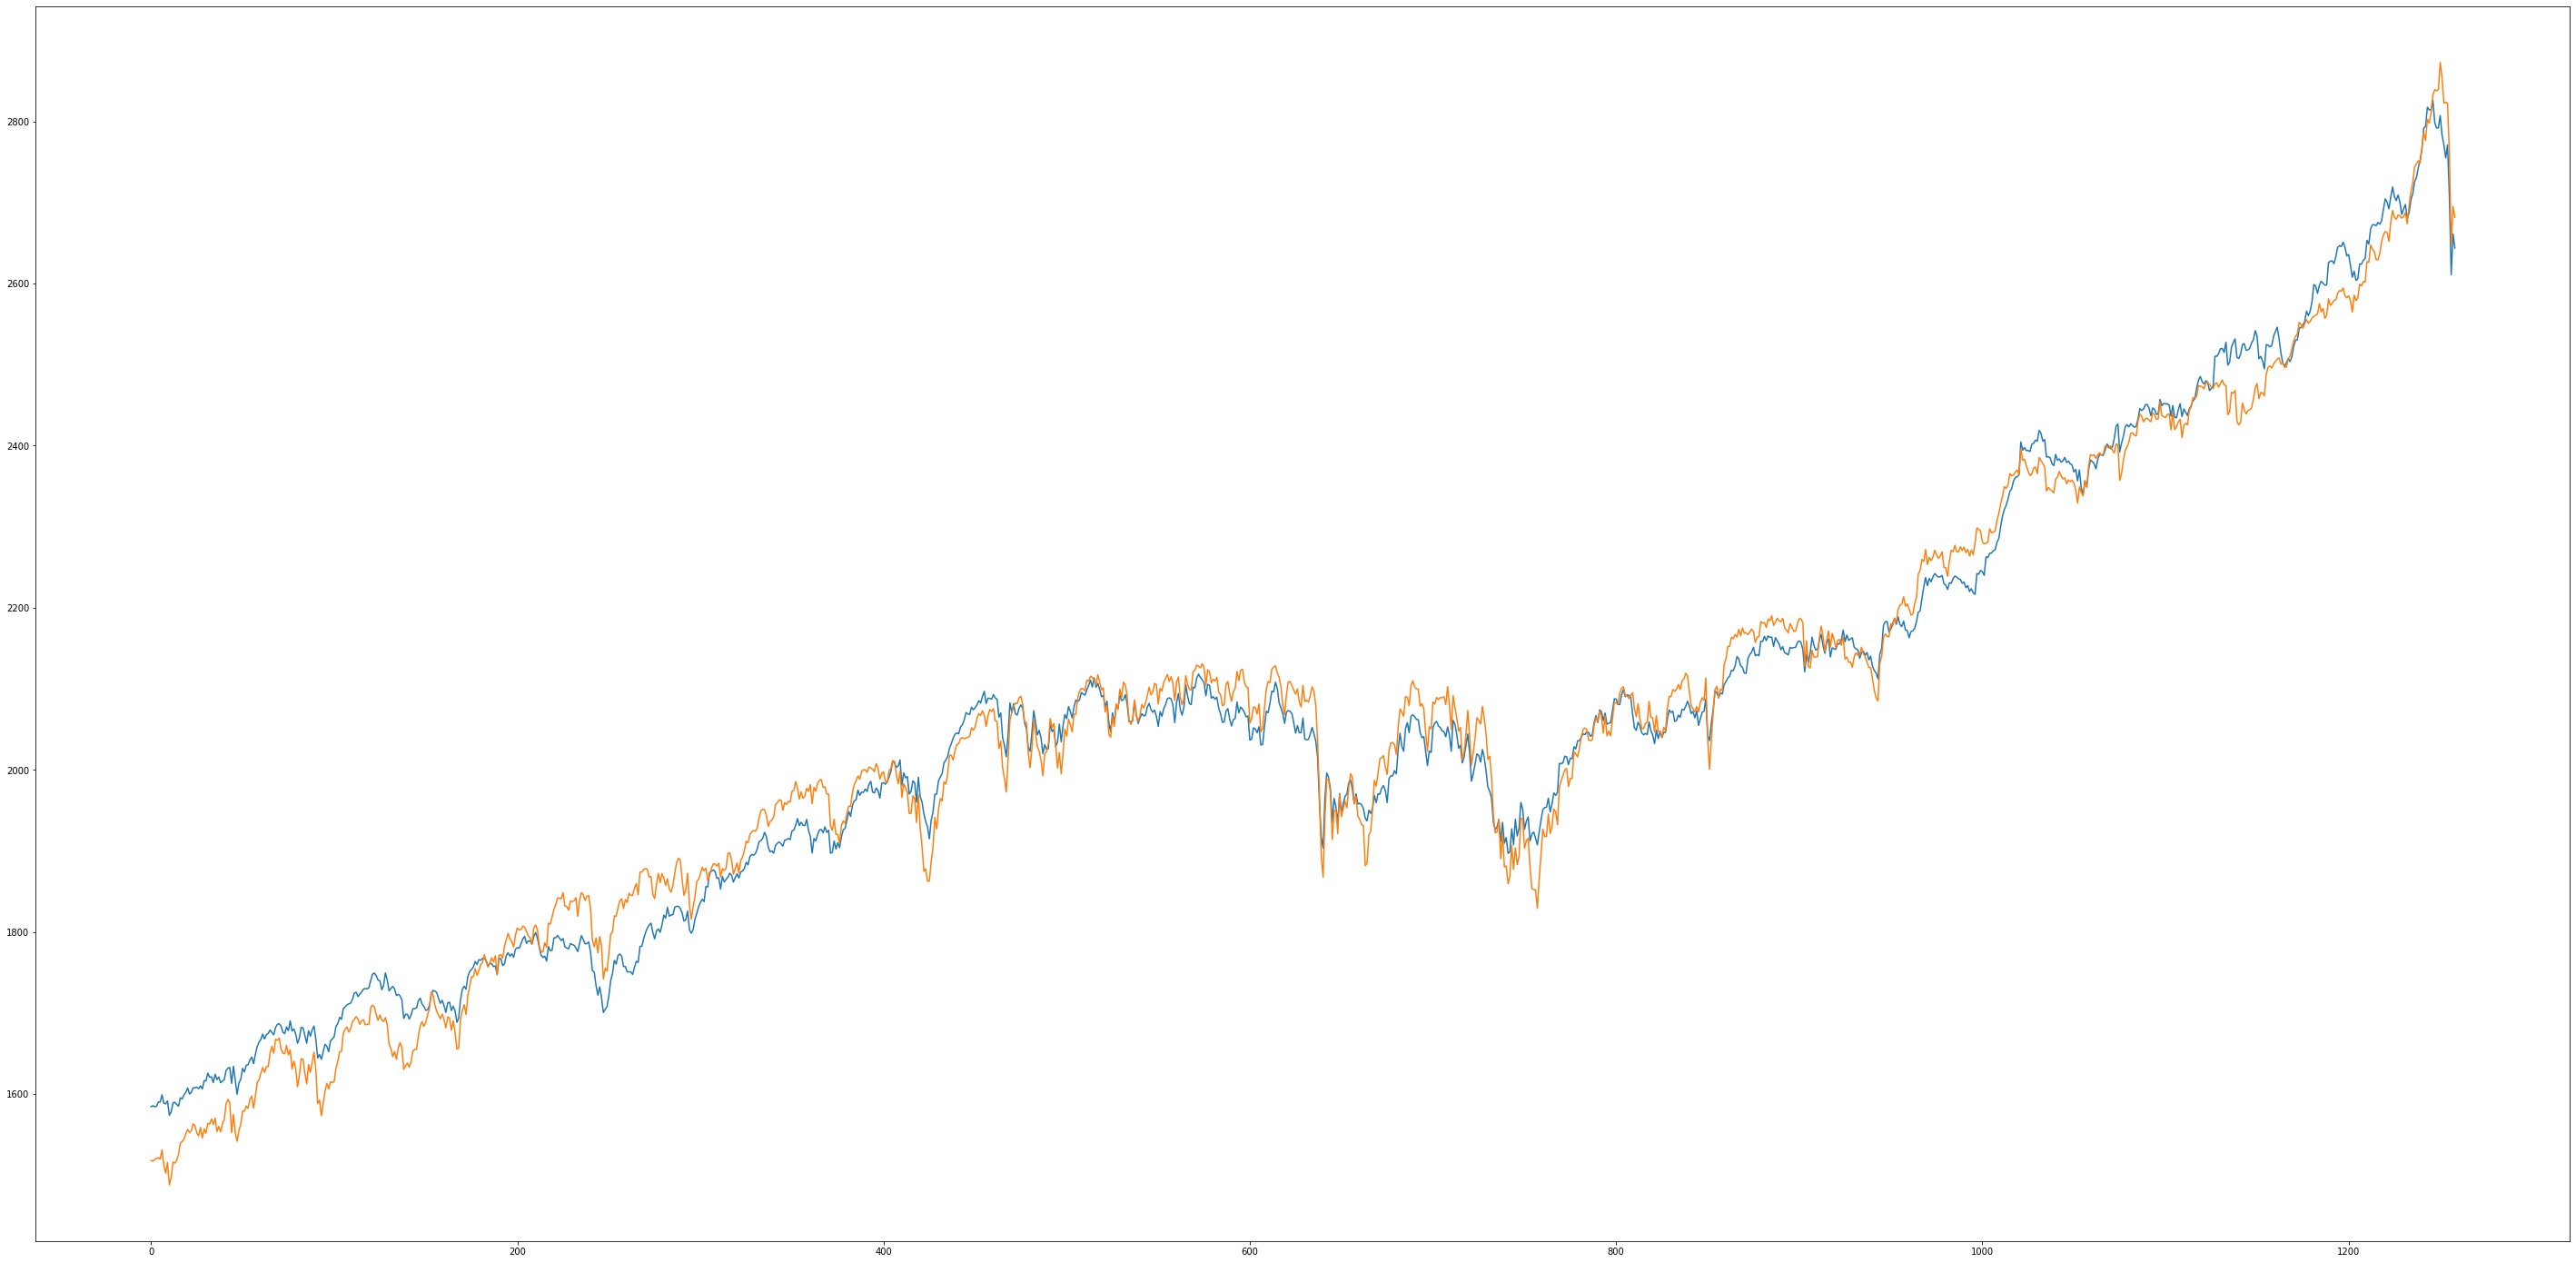

In [46]:

plt.plot(X_pd.index,y_pred)
plt.plot(x_compare,y_compare)
plt.plot()



### 1.3.4 Check the significance of the variables by looking at the p-values of each variable, are the coefficients significant? How can you phrase a few words to explain the coefficients to Joe?

The p-values, in this case, come from a hypothesis test where we study if the dependent variable has no correlation with the independent variable associated to certain coefficient.

We want to test using 'reductio ad-absurdum' if our dependent variable has no correlation with the independent variable and for that reason we calculate the p-values for each of the variables.

The significance level $\alpha$ usually is less than 0.05. Using this criteria we see that MSFT is not fullfiling our criteria, therefore for MSFT we reject the null hypothesis (H_0: MSFT has no correlation with SP500).

The other variables have a significance level which is less than 0.05, therefore we accept the null hypothesis. In this case we should reject the variable MSFT. What I mean by reject is that we should modify our model dropping this variable first.

To Joe: We need to decide if we are using more variables than needed and to do that we use a parameter to measure if some of the information of some of our variables is 'repeated' in some sense. This parameter is called p-value. 
This is much more technical but just keep in mind that we need to choose an adequate number of variables and we don't want to add repeated information to our model.

__A final remark:__ If we take a threshold given by $\alpha < 0.01$ then we should also consider dropping the variable JPM. 

### 1.3.5 Can you use the model to predict future SP500 price, what is preventing you from doing that?

We shouldn't use this model. First we should drop the variable 'MSFT' because the previous reasoning (1.3.4).
This is what is preventing me from using this model to predict future prices.



# 2 Mammal classification tree


You were given a data set "zoo.csv" that includes 101 animals and a list of characteristics of the animals e.g. do they have feather, do they lay eggs or not etc. Build a CART model to classify if an animal is mammal or not.

1. Calculate the overall entropy of of the target variable "ismammal", using the definition $H = p_1\log(p_1)+ (1 − p_1)\log(1 − p_1)$


2. To build a classification tree, you need to decide the splitter for each nodes of a binary tree. Using the criterion that hair > 0.5 and split the dataset in to two branches. Calculate the entropy at each branch and the average entropy change.


3. Check the entropy changes for all the following features i.e. ’feathers’, ’eggs’, ’airborne’, ’aquatic’ and ’backbone’. Which one would you use to make the first split?


4. Build a CART model using the sklearn package and compare the model with your calculation. Is the first split the same as yours? You may use the python code provided in "CARTmammals.py"

In [47]:
# Loading dataset

zoo = pd.read_csv('zoo.csv') # data zoo 
zoo



,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,ismammal
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 1. Calculate the overall entropy of of the target variable "ismammal", using the definition 
$$H = -(p_1\log(p_1)+ (1−p_1)\log(1−p_1))$$

Remark: I prefer the convention which use the minus sign.

In [48]:
def entropy(y): # entropy function - binary variables
    p1 = float(y.sum())/float(len(y))+1e-20 # how many 1's divided by the total and a perturbation to avoid zeros (log)
    return -(p1*np.log(p1)+(1-p1)*np.log(1-p1))

In [49]:
# Calculating the probability

p_1 = sum(zoo.ismammal.values)/len(zoo.ismammal)
p_1



0.40594059405940597

In [50]:
# Here we calculate the entropy for the variable ismammal

root_H = entropy(zoo.ismammal)
root_H

0.6753469676511341

### 2. To build a classification tree, you need to decide the splitter for each nodes of a binary tree. Using the criterion that hair > 0.5 and split the dataset in to two branches. Calculate the entropy at each branch and the average entropy change.

In [51]:
def Dentropy(data, y, splitter): #entropy change after splits D from increase (Df 'increase/variation of f')
    yleft = y[data[splitter]<=0.5] # data points that goes to the left
    yright = y[data[splitter]>0.5] # data points that goes to the right
    H2 = (len(yleft)*entropy(yleft)+len(yright)*entropy(yright))/float(len(yleft)+len(yright)) # average entropy after splitting
    H1 = entropy(y) #entropy before splits
    dH = H1-H2 # increase - H2 child nodes
    return (dH, entropy(yleft), entropy(yright))

In [52]:
Dentropy(zoo,zoo.ismammal,'hair') # entropy increement, entropy left, entropy right.

(0.45745361219874314, 0.14999492361041503, 0.30947728677412595)

### 3. Check the entropy changes for all the following features i.e. ’feathers’, ’eggs’, ’airborne’, ’aquatic’ and ’backbone’. Which one would you use to make the first split?

In [53]:
list = ['feathers','eggs','airborne','aquatic','backbone']

print('Variables', '          dH  ', '         entropy left (<=0.5)', '  entropy right (>0.5)')
for i in list:
    print(i, Dentropy(zoo,zoo.ismammal,i))
    

Variables           dH            entropy left (<=0.5)   entropy right (>0.5)
feathers (0.11951777330426805, 0.6930709707288083, 4.605170185988091e-19)
eggs (0.545548294176191, 0.19144408195771742, 0.08591550133466311)
airborne (0.07881327648853365, 0.6930628469360363, 0.2868359830561607)
aquatic (0.070571992795597, 0.6901856760188042, 0.45056120886630463)
backbone (0.10579061374678222, 4.605170185988091e-19, 0.6930745993293921)


__The largest information gain, with respect ismammals, is given by the variable eggs. We should use this variable in our first split.__

### 4. Build a CART model using the sklearn package and compare the model with your calculation. Is the first split the same as yours? You may use the python code provided in "CARTmammals.py"

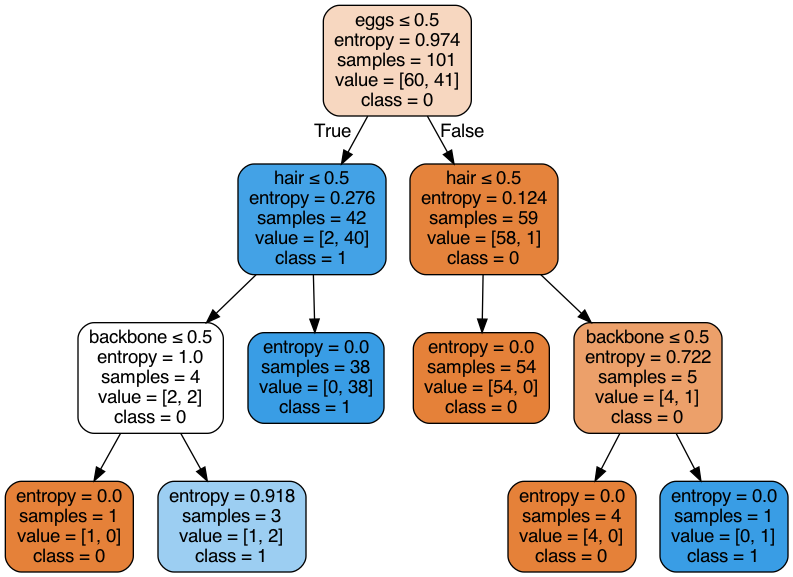

In [54]:
import pandas as pd
from sklearn import tree
#from sklearn.externals.six import StringIO
import six
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

feature_cols = ['hair', 'feathers', 'eggs', 'airborne', 'aquatic', 'backbone']
X = zoo[feature_cols] #
y = zoo.ismammal

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X, y)


dot_data = StringIO()

# Visualization  in graph
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mammal.png')
Image(graph.create_png())

# if the visualization code does not work you may use tree.plot



### Is the first split the same as yours?

Yes, it is.